In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd)) + '/ooipy'
sys.path.append(ooipy_dir)
#from ooipy.hydrophone import Noise_Interferometry
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import pickle
import scipy
import seaborn as sns
import progressbar
import plotly.express as px

cwd = os.getcwd()
code_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(code_dir)

from Noise_Interferometry.Modules import analysis
from Noise_Interferometry.Modules import snr_tools

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [73]:
filename = '/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/Longterm_MA_2019_201.pkl'
nccfs = pickle.load( open( filename, "rb" ) )

In [88]:
snr, peak_id, noise_std = nccfs.snr_of_peak_amp('dB')
px.line(snr)

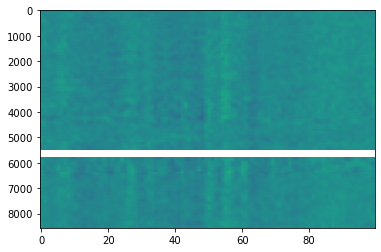

In [89]:
plt.imshow(nccfs.peaks['dB'], aspect='auto')

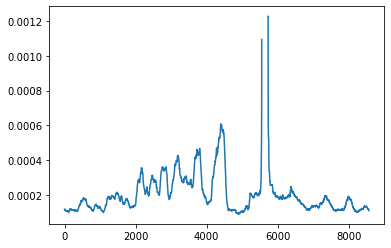

In [90]:
plt.plot(noise_std)

In [84]:
print(snr[5000])
px.line(x=nccfs.t, y=np.abs(nccfs.NCCFs_c[5000,:]))

12.6599737394


## Examining NCCFs

In [93]:
year = 2020
filename = f'/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/Longterm_MA_{year}_201.pkl'
nccfs = pickle.load( open( filename, "rb" ) )

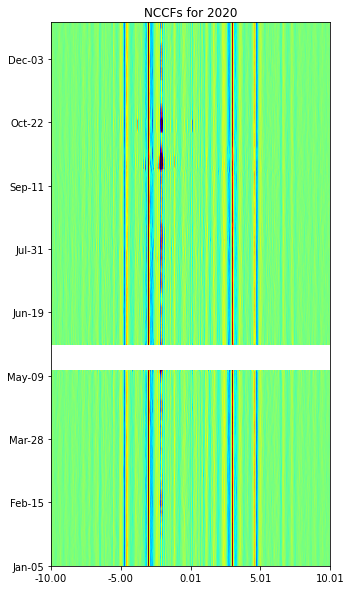

In [94]:
xticks = np.array([0, 1000, 2000, 3000, 4000])
xlabels_num = nccfs.t[xticks + 4000]
xlabels = np.array(["%.2f" % xlabel for xlabel in xlabels_num])

yticks = np.linspace(0,8000,9)
ylabels = nccfs.dates[yticks.astype(int)]
for k in range(len(ylabels)):
    ylabels[k] = ylabels[k].strftime('%b-%d')


fig = plt.figure(figsize=(5,10))
limit = 0.001
plt.imshow(nccfs.NCCFs[:,4000:8000], origin='lower', vmax=limit, vmin=-limit, aspect='auto', cmap='jet')
plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)
plt.title(f'NCCFs for {year}')

fig.savefig(f'NCCFs_{year}.png',dpi=300)